In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.duration.hazard_regression as coxph
import lifelines
#from lifelines.datasets import load_rossi
import matplotlib.pyplot as plt
import dcurves

In [2]:
pd.set_option('display.max_rows', 500)


In [3]:
df_binary = dcurves.load_test_data.load_binary_df()
df_surv = dcurves.load_test_data.load_survival_df()
df_case_control = dcurves.load_test_data.load_case_control_df()
df_cancer_dx = dcurves.load_test_data.load_cancerdx_df()

In [4]:
binary_output_df = dcurves.dca(
        data = df_binary,
        outcome = 'cancer',
        predictors = ['cancerpredmarker', 'marker'],
        thresh_vals = [0.01, 1.0, 0.01],
        probabilities = [False, True]
)


/Users/ShaunPorwal/Documents/GitHub/python_packages/dcurves/dcurves/dca.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_frame[predictor] = [(1 - val) for val in predicted_vals]
/Users/ShaunPorwal/Documents/GitHub/python_packages/dcurves/dcurves/dca.py:429: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_frame['all'] = [1 for i in range(0, len(model_frame.index))]
/Users/ShaunPorwal/Documents/GitHub/python_packages/dcurves/dcurves/dca.py:430: SettingWithCopyWarning: 
A value is trying to be se

In [5]:
survival_output_df = dcurves.dca(
    data = df_surv,
    outcome = 'cancer',
    predictors = ['cancerpredmarker'],
    thresh_vals = [0.01, 1.0, 0.01],
    probabilities = [False],
    time = 1,
    time_to_outcome_col = 'ttcancer'
)

/Users/ShaunPorwal/Documents/GitHub/python_packages/dcurves/dcurves/dca.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_frame[time_to_outcome_col] = data[time_to_outcome_col]


In [6]:
dan_test_output_df = dcurves.dca(
    data = df_cancer_dx,
    outcome = 'cancer',
    predictors = ['famhistory'],
    thresh_vals = [0.01, 1.0, 0.01],
    probabilities = [False]
)


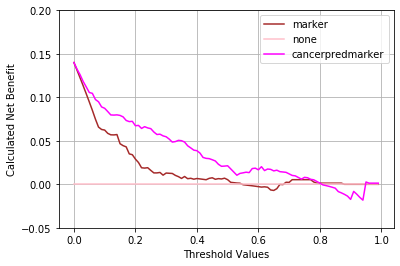

In [15]:
dcurves.plot_net_benefit_graphs(binary_output_df, y_limits=[-0.05, 0.2], color_names=['brown', 'pink', 'magenta'])

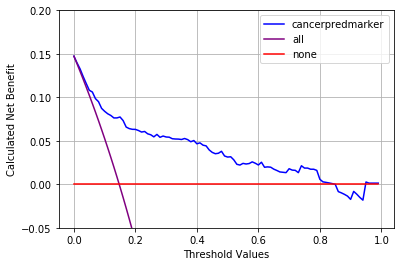

In [8]:
dcurves.plot_net_benefit_graphs(output_df=survival_output_df)

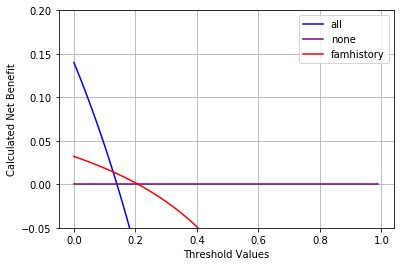

In [9]:
dcurves.plot_net_benefit_graphs(dan_test_output_df)


In [10]:
# dan_test_output_df.to_csv('/Users/ShaunPorwal/Desktop/dan_test_python_output.tsv')

In [11]:
# dan_test_output_df

In [12]:
help(dcurves.dca)

Help on function dca in module dcurves.dca:

dca(data: pandas.core.frame.DataFrame, outcome: str, predictors: list, thresh_vals: list = [0.01, 1, 0.01], harm: dict = None, probabilities: list = [False], time: float = None, prevalence: float = None, time_to_outcome_col: str = None) -> pandas.core.frame.DataFrame
    Perform Decision Curve Analysis
    
    |
    
    Diagnostic and prognostic models are typically evaluated with measures of
    accuracy that do not address clinical consequences.
    
    Decision-analytic techniques allow assessment of clinical outcomes but often
    require collection of additional information may be cumbersome to apply to
    models that yield a continuous result. Decision curve analysis is a method
    for evaluating and comparing prediction models that incorporates clinical
    consequences, requires only the data set on which the models are tested,
    and can be applied to models that have either continuous or dichotomous
    results.
    The dca f

In [13]:
a = [1,2,3,4,0.5]
max(a)


4